<h1 style="color: Tomato"> Perceptron Algorithm for Single Layer </h1>
<h2> &emsp; Training Process: </h2>
<img src='perceptron.jpeg' width='600'>
<br>
- First initalize the weights as 0 or small values.
- Then, for each example j in our training set, perforrm the following steps over the input $x_j$ and the desired output $d_j$:
    - Calculate the output: 
    $$
    y_j = f(w_j * x_j) \\
    y_j = f(w_0*x_{j,0} + w_1*x_{j,1} + w_2*x_{j,2} + ... + w_n*x_{j,n}) \\
    \vec{y} = X \cdot \vec{w} ;\quad X\ is\ the\ input\ matrix\ that\ includes\ bias\ as\ x_0
    $$
    <br>
    - Update the weight if desired output and the calculated output: ($d_j \neq y_j$)
    $$
    w_i = w_i + \alpha * (d_j - y_j) * x_{j,i} \quad for\ all\ features\ 0 \leq i \leq n,\ and\ alpha\ is\ the\ learning\ rate\\
    $$


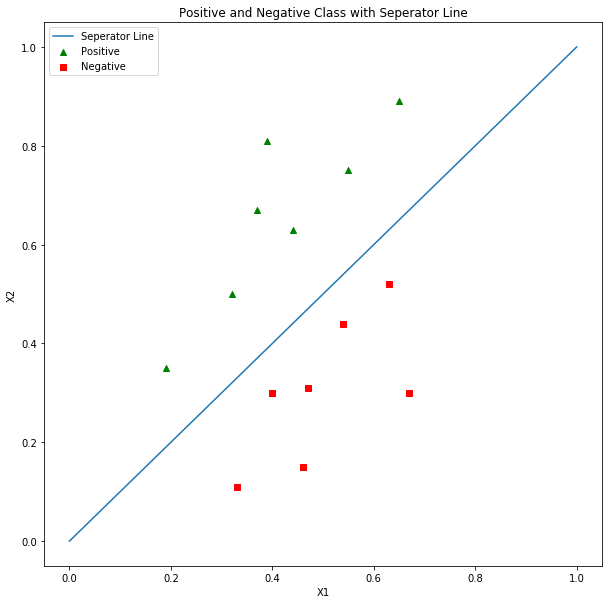

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
Perceptron Algorithm for Single Layer:
    -> Training Process:
        1- initialize the weights as [0, 0, 0]
        2- for each example j in our training set
          - calculate the output for each x_j: y_j = f(w(t)*x_j)
                                                   = f(w.x_j)
          - update the weight if the desired output and calculated output doesn't match:
            w(t) = w(t) + (learningRate * loss * x_j)
            loss = desiredOut - calculatedOut
    
    -> Used step function as an activation function 
'''

# data = [x0, x1, x2, y] -- x0 is the bias term
data = np.array([[1.00, 0.46, 0.15],    # neg
                 [1.00, 0.54, 0.44],    # neg
                 [1.00, 0.37, 0.67],    # pos
                 [1.00, 0.67, 0.30],    # neg
                 [1.00, 0.39, 0.81],    # pos
                 [1.00, 0.32, 0.50],    # pos
                 [1.00, 0.65, 0.89],    # pos
                 [1.00, 0.33, 0.11],    # neg
                 [1.00, 0.47, 0.31],    # neg
                 [1.00, 0.44, 0.63],    # pos
                 [1.00, 0.19, 0.35],    # pos
                 [1.00, 0.63, 0.52],    # neg
                 [1.00, 0.40, 0.30],    # neg
                 [1.00, 0.55, 0.75],    # pos
                ])

X = data
y = np.empty((0, ))
posClass = np.empty((0, 2))
negClass = np.empty((0, 2))

# Plot positive class, negative class and the possible seperator
# First draw a seperator then set data points to right place
# Plot y = x line, so it means ==> x2 = x1 
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot([0, 1], [0, 1])

for i in range(data.shape[0]):
    if data[i, 2] > data[i, 1]:
        posClass = np.append(posClass, np.array([data[i, 1:]]), axis=0)
        y = np.append(y, 1)
    else:
        negClass = np.append(negClass, np.array([data[i, 1:]]), axis=0)
        y = np.append(y, 0)
        
plt.scatter(posClass[:, 0], posClass[:, 1], color='g', marker='^')    
plt.scatter(negClass[:, 0], negClass[:, 1], color='r', marker='s')
plt.title('Positive and Negative Class with Seperator Line')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['Seperator Line', 'Positive', 'Negative'])
plt.show()

############################### EPOCH: 1 ###############################


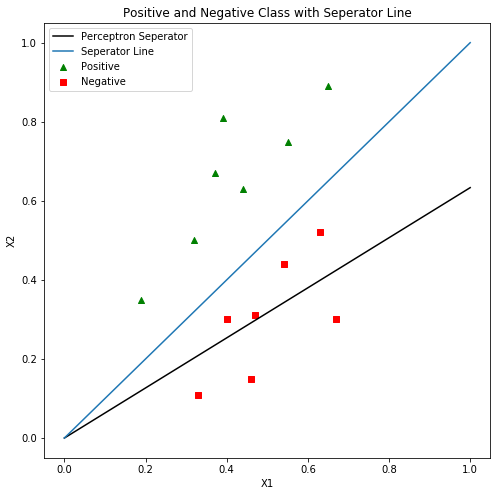



############################### EPOCH: 2 ###############################


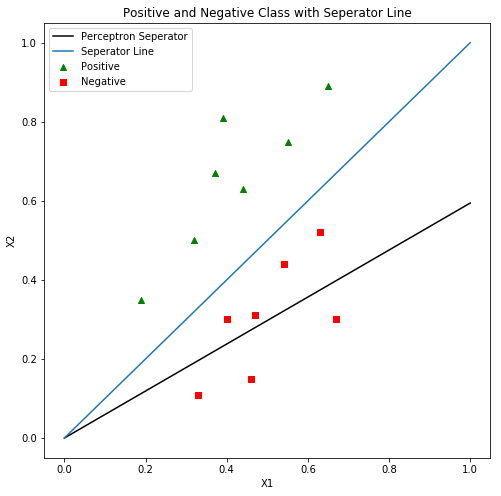



############################### EPOCH: 3 ###############################


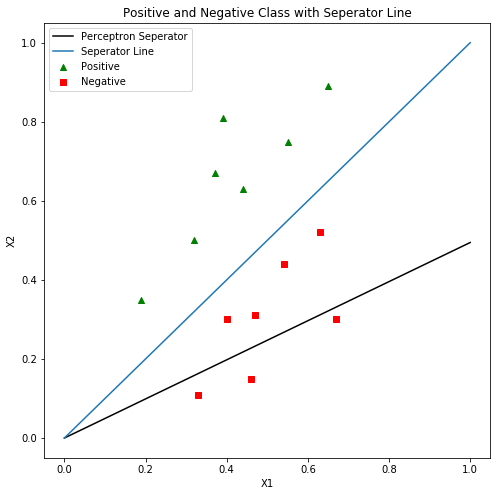



############################### EPOCH: 4 ###############################


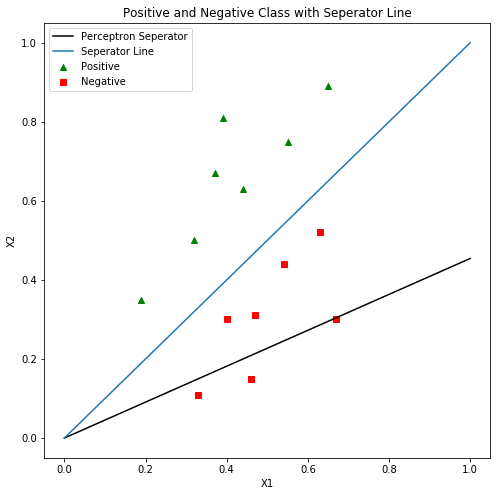



############################### EPOCH: 5 ###############################


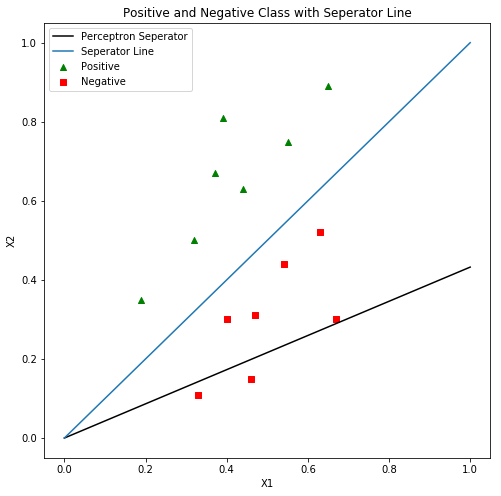



############################### EPOCH: 6 ###############################


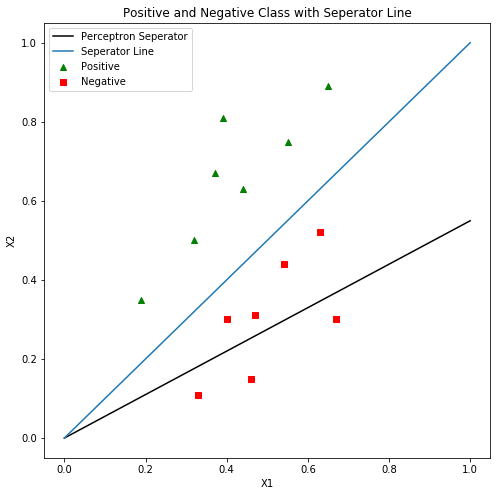



############################### EPOCH: 7 ###############################


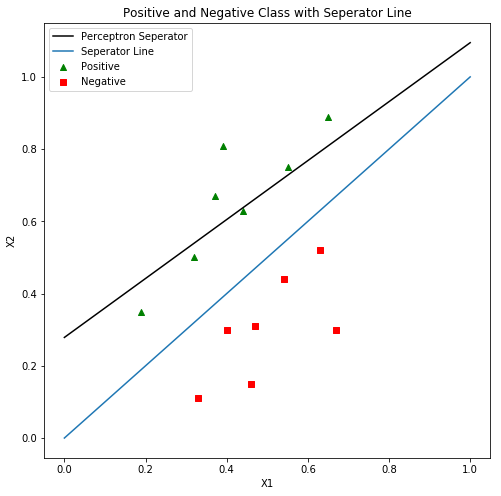



############################### EPOCH: 8 ###############################


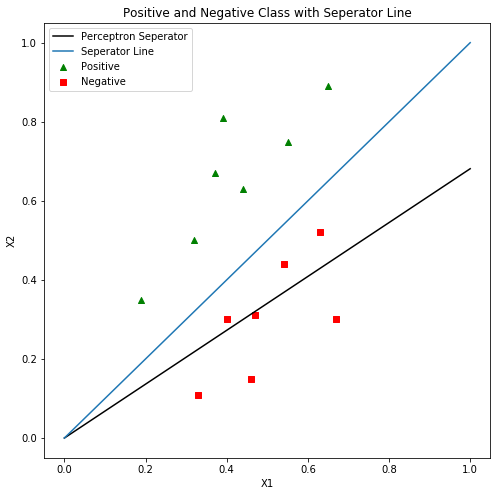



############################### EPOCH: 9 ###############################


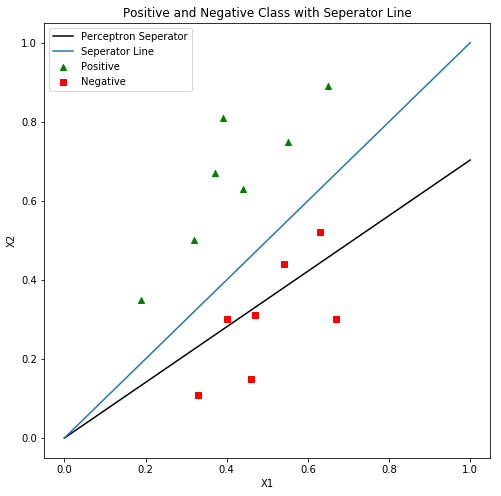



############################### EPOCH: 10 ###############################


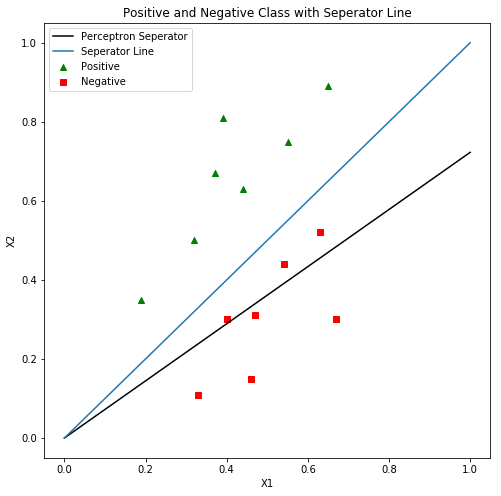



############################### EPOCH: 11 ###############################


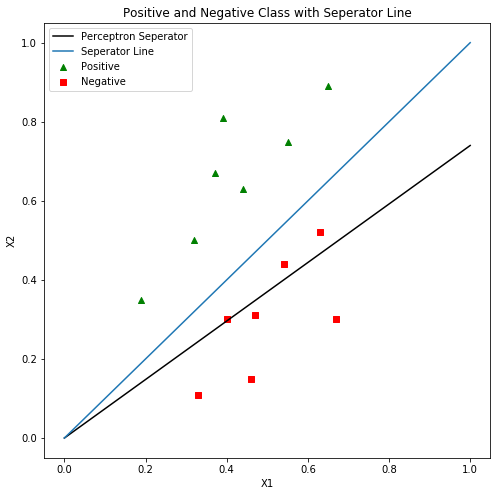



############################### EPOCH: 12 ###############################


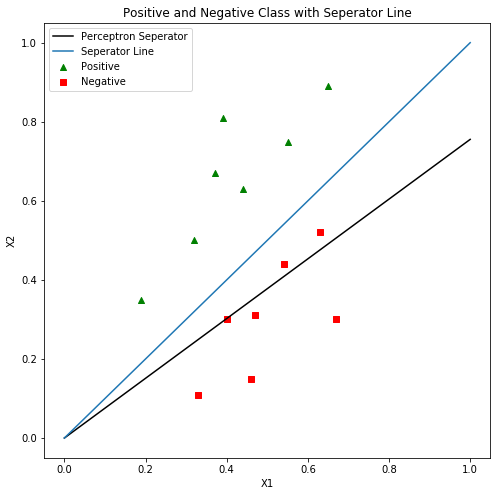



############################### EPOCH: 13 ###############################


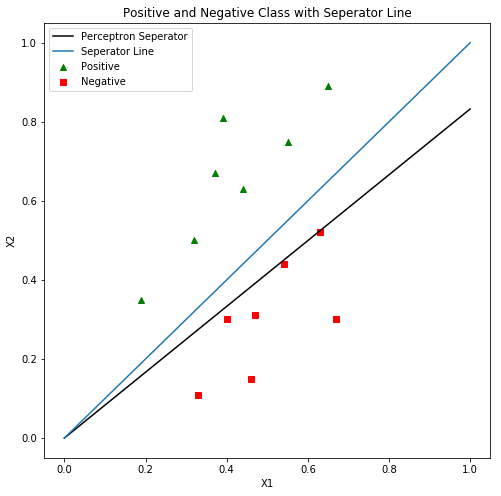



############################### EPOCH: 14 ###############################


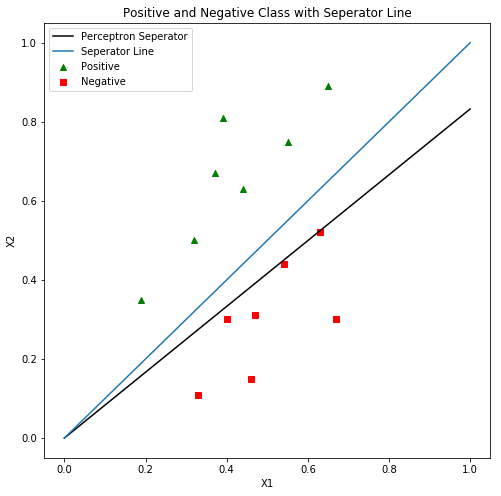



############################### EPOCH: 15 ###############################


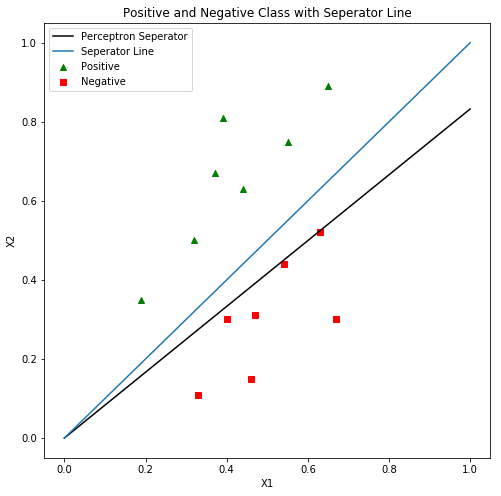



############################### EPOCH: 16 ###############################


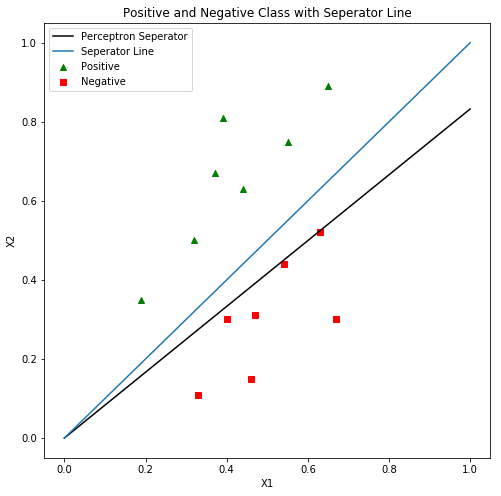



############################### EPOCH: 17 ###############################


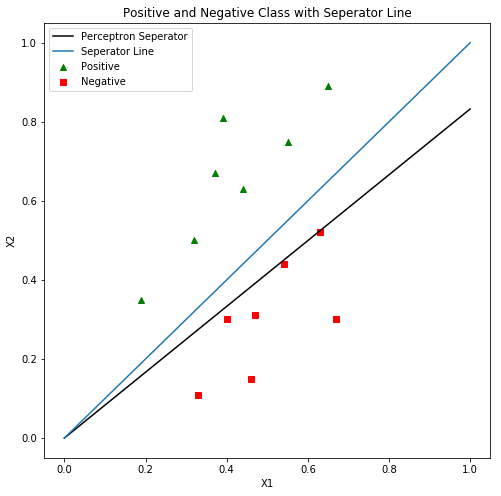



############################### EPOCH: 18 ###############################


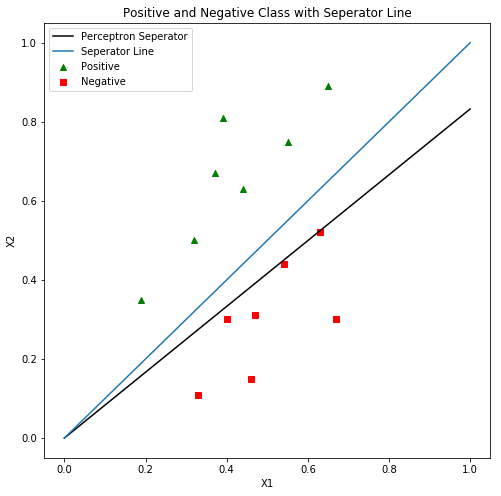



############################### EPOCH: 19 ###############################


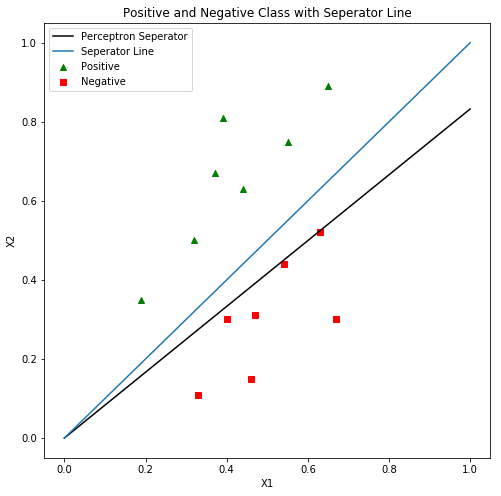



############################### EPOCH: 20 ###############################


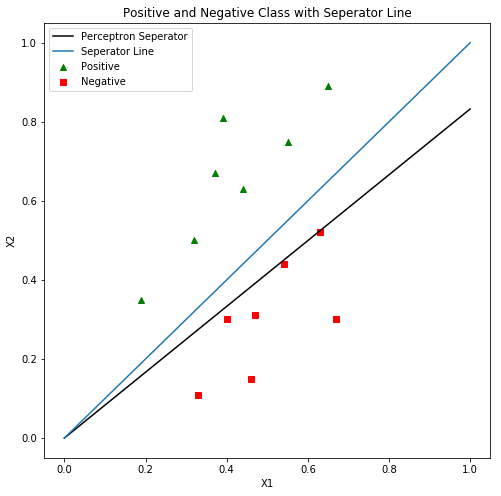

In [5]:
def PlotPerceptronLine(weight):
    a = -weight[1]/weight[2]
    b = -weight[0]/weight[2]
    y = lambda x: a*x + b
    x = np.linspace(0, 1)
    plt.rcParams["figure.figsize"] = (8, 8)
    plt.plot(x, y(x), color='black')
    plt.plot([0, 1], [0, 1])
    plt.scatter(posClass[:, 0], posClass[:, 1], color='g', marker='^')    
    plt.scatter(negClass[:, 0], negClass[:, 1], color='r', marker='s')
    plt.title('Positive and Negative Class with Seperator Line')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(['Perceptron Seperator', 'Seperator Line', 'Positive', 'Negative'])
    plt.show()

def StepFunction(x, threshold=0.0):
    if x > threshold:
        return 1
    else: 
        return 0
    
def Predict(x, weight):
    weightedSum = np.dot(x, weight)
    return StepFunction(weightedSum)
    
def Accuracy(X, y, weight):
    correct = 0.0
    for i in range(X.shape[0]):
        pred = Predict(X[i], weight)
        if pred == y[i]:
            correct += 1.0
    return correct/float(X.shape[0])

def Perceptron(X, y, w = np.zeros(3, ), epochs = 21, lrate = 1.0):
    accuracy = []
    for epoch in range(1, epochs):    
        curr_accuracy = Accuracy(X, y, w)
        accuracy.append(curr_accuracy*100)
        
        print('############################### EPOCH: %d ###############################' %epoch)
        for i in range(X.shape[0]):
            pred  = Predict(X[i], w)
            error = y[i] - pred
            for j in range(w.shape[0]):
                w[j] = w[j] + (lrate * error * X[i, j])
        PlotPerceptronLine(w)
        print('\n')
    return w, accuracy

w, acc = Perceptron(X, y)

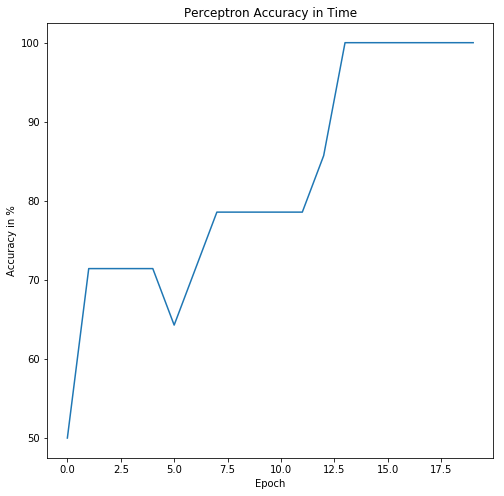

In [4]:
plt.plot(acc)
plt.title('Perceptron Accuracy in Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy in %')
plt.show()